# Classes

In [3]:
class Course():
    def __init__(self, name, classroom, teacher, ects, grade=0):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ects = ects
        self.grade = grade

    def __str__(self):
        return f"<<Course object: {self.name} {self.classroom} {self.teacher} {self.ects} {self.grade}>>"

    def __repr__(self):
        return f"Course('{self.name}', '{self.classroom}', '{self.teacher}', '{self.ects}', '{self.grade}')"


class DataSheet():
    def __init__(self, courses=[]):
        self.courses = courses

    def get_grades_as_list(self):
        return [course.grade for course in self.courses]

    def get_ects_points(self):
        return [course.ects for course in self.courses]

    def __str__(self):
        return f"<<DataSheet object: {self.courses} >>"

    def __repr__(self):
        return f"DataSheet('{self.courses})"


class Student():
    def __init__(self, name, data_sheet, img_url, gender="male"):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.img_url = img_url

    def get_avg_grade(self):
        grades = self.data_sheet.get_grades_as_list()
        sum = 0
        for grade in grades:
            sum += grade
        return sum / len(grades)

    def get_study_progression_in_procent(self):
        ects_points = self.data_sheet.get_ects_points()
        sum = 0
        for ects in ects_points:
            sum += ects
        return sum / 150 * 100

    def __str__(self):
        return f"<<Student object: {self.name} {self.gender} {self.data_sheet} {self.img_url} >>"

    def __repr__(self):
        return f"Student('{self.name}', '{self.gender}', '{self.data_sheet}', '{self.img_url}' >>"

# Functions


In [4]:
import csv
import platform
import random

def write_csv_file_row_from_list(file_list):
    if platform.system() == 'Windows':
        newline = ''
    else:
        newline = None
    with open('output.csv', 'w', newline=newline) as output_file:
        output_writer = csv.writer(output_file)
        for lst in file_list:
            output_writer.writerow(lst)


def generate_student_file_list(student_list):
    file_list = [["stud_name", "course_name", "teacher",
                  "etcs", "classroom", "grade", "img_url"]]
    for student in student_list:
        for course in student.data_sheet.courses:
            file_list.append([student.name, course.name, course.teacher,
                              course.ects, course.classroom, course.grade, student.img_url])
    return file_list


def generate_random_course_list():
    courses = ["Math", "English", "History", "Engineering"]
    grades = [2, 4, 7, 10, 12]
    teacher = "Harry Potter"
    ects_points = [5, 10, 20]
    course_one = Course(courses.pop(random.randint(
        0, len(courses) - 1)), "classroom101", teacher, ects_points[random.randint(0, len(ects_points) - 1)], grades[random.randint(0, len(grades) - 1)])
    course_two = Course(courses.pop(random.randint(
        0, len(courses) - 1)), "classroom101", teacher, ects_points[random.randint(0, len(ects_points) - 1)], grades[random.randint(0, len(grades) - 1)])
    course_three = Course(courses.pop(random.randint(
        0, len(courses) - 1)), "classroom101", teacher, ects_points[random.randint(0, len(ects_points) - 1)], grades[random.randint(0, len(grades) - 1)])
    course_four = Course(courses.pop(random.randint(
        0, len(courses) - 1)), "classroom101", teacher, ects_points[random.randint(0, len(ects_points) - 1)], grades[random.randint(0, len(grades) - 1)])
    courses = [course_one, course_two, course_three, course_four]
    return courses


names = ["John", "Boris", "Ivan", "Oscar"]


def generate_random_n_number_students(number):
    genders = ["male", "female"]
    student_list = []
    counter = 0
    while counter < number:
        counter += 1
        courses = generate_random_course_list()
        data_sheet = DataSheet(courses=courses)
        student = Student(names.pop(random.randint(0, len(names) - 1)),
                          data_sheet, "img_url", gender=genders[random.randint(0, 1)])
        student_list.append(student)
    student_list_ready = generate_student_file_list(student_list)
    write_csv_file_row_from_list(student_list_ready)

def read_file_to_list(file):
    with open(file) as f:
        reader = csv.reader(f)
        header_row = next(reader)
        student_list = []
        for row in reader:
            student_list.append(row)
    return student_list


def convert_list_to_student_list(student_list):
    list_of_students = []
    counter = 0
    while counter < len(student_list):
        student_name = student_list[counter][0]
        img_url = student_list[counter][6]
        courses = []
        while counter < len(student_list) and student_name == student_list[counter][0]:
            course = Course(student_list[counter][1], student_list[counter][4],
                            student_list[counter][2], int(student_list[counter][3]), int(student_list[counter][5]))
            courses.append(course)
            counter += 1
        data_sheet = DataSheet(courses=courses)
        student = Student(student_name, data_sheet, img_url)
        list_of_students.append(student)
    return list_of_students


def print_average_grades(student_list):
    for student in student_list:
        print(
            f"Name: {student.name}, img_url: {student.img_url}, avg_grade: {student.get_avg_grade()}")


def create_dict_with_avg_grade(student_list):
    student_dict = {}
    for student in student_list:
        student_dict[student.name] = student.get_avg_grade()
    return student_dict


def get_avg_grade(student):
    grades = student.data_sheet.get_grades_as_list()
    sum = 0
    for grade in grades:
        sum += grade
    return sum / len(grades)


def sort_students_by_avg_grade(students):
    students.sort(key=get_avg_grade)

# TEST

In [5]:
#generate_random_n_number_students(4)

students = read_file_to_list("output.csv")
list_of_students = convert_list_to_student_list(students)
print_average_grades(list_of_students)
print(list_of_students)
print("\n")
sort_students_by_avg_grade(list_of_students)
print(list_of_students)

Name: Oscar, img_url: img_url, avg_grade: 7.75
Name: Boris, img_url: img_url, avg_grade: 5.0
Name: John, img_url: img_url, avg_grade: 6.0
Name: Ivan, img_url: img_url, avg_grade: 9.5
[Student('Oscar', 'male', '<<DataSheet object: [Course('English', 'classroom101', 'Harry Potter', '5', '2'), Course('History', 'classroom101', 'Harry Potter', '5', '10'), Course('Engineering', 'classroom101', 'Harry Potter', '20', '7'), Course('Math', 'classroom101', 'Harry Potter', '10', '12')] >>', 'img_url' >>, Student('Boris', 'male', '<<DataSheet object: [Course('Engineering', 'classroom101', 'Harry Potter', '10', '2'), Course('English', 'classroom101', 'Harry Potter', '20', '12'), Course('History', 'classroom101', 'Harry Potter', '5', '2'), Course('Math', 'classroom101', 'Harry Potter', '10', '4')] >>', 'img_url' >>, Student('John', 'male', '<<DataSheet object: [Course('Math', 'classroom101', 'Harry Potter', '5', '10'), Course('English', 'classroom101', 'Harry Potter', '5', '2'), Course('Engineering'

## create a bar chart with student_name on x and avg_grade on y-axis

Text(0.5, 1.0, 'Average grades for students')

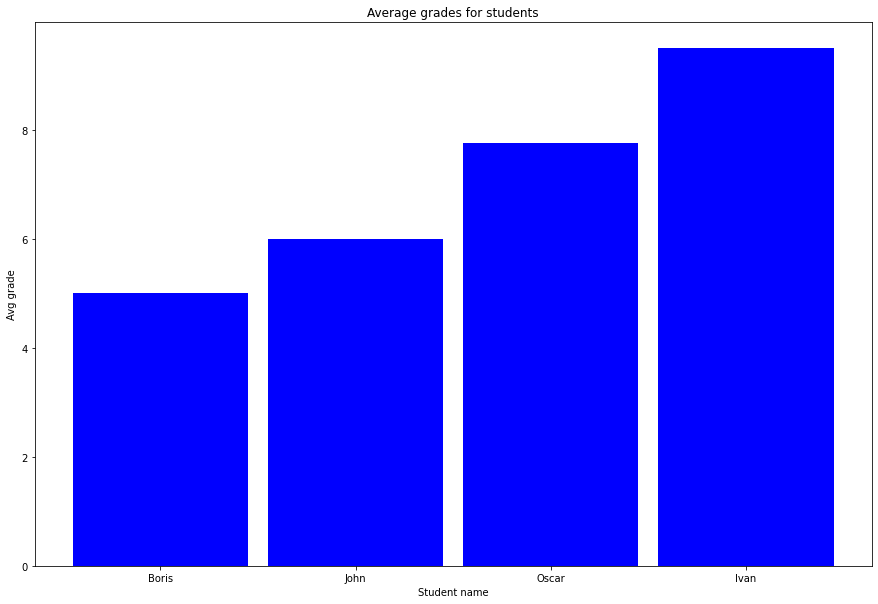

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# creating the dataset
data = create_dict_with_avg_grade(list_of_students)
students = list(data.keys())
avg_grade = list(data.values())

plt.figure(figsize=(15, 10))

# creating the bar plot
plt.bar(students, avg_grade, color='blue',
        width=0.9)

plt.xlabel("Student name")
plt.ylabel("Avg grade")
plt.title("Average grades for students")



## Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Text(0.5, 1.0, 'Study progression for students')

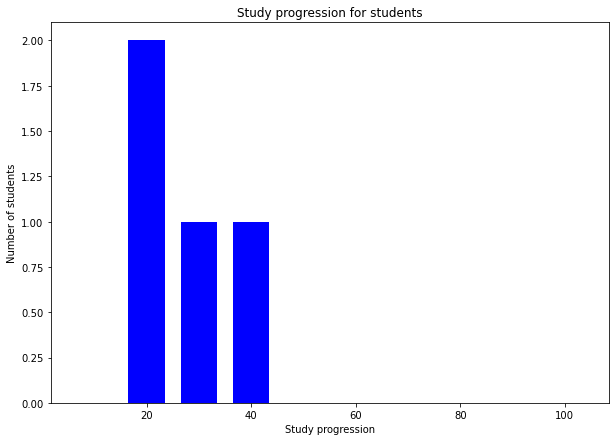

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

progress = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
test = [0, 2, 1, 1, 0, 0, 0, 0, 0, 0]
fig = plt.figure(figsize=(10, 7))
plt.bar(progress, test, color='blue',
        width=7)

plt.xlabel("Study progression")
plt.ylabel("Number of students")
plt.title("Study progression for students")